In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# First, let's see how the data looks like.

In [3]:
tmdb = pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [35]:
tmdb.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [4]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

# Now, we will analyse the movies according to the original language.

In [5]:
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [6]:
language_count = tmdb.original_language.value_counts().to_frame().reset_index()
language_count.columns = ["original_language","total"]
language_count.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


There are a lot more english entries, as expected, so we will analyse the overall number of movies in two ways: comparing english movies with the rest and comparing the data without the english spoken movies.

In [9]:
language_total = tmdb["original_language"].value_counts()
total = language_total.sum()
total_english = language_total.loc["en"]
total_others = total - total_english
print(total_english, total_others)

4505 298


In [10]:
data = {
    'language' : ['english','others'],
    'total' : [total_english, total_others]

}

data = pd.DataFrame(data)
data

,language,total
0,english,4505
1,others,298


<Axes: xlabel='language', ylabel='total'>

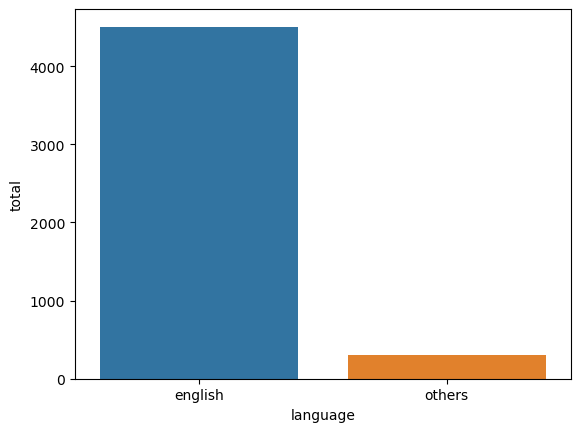

In [11]:
sns.barplot(data = data, x = 'language', y='total')

([<matplotlib.patches.Wedge at 0x79f47d7be890>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'english'),
  Text(1.0791697511565306, -0.2130555049482467, 'others')])

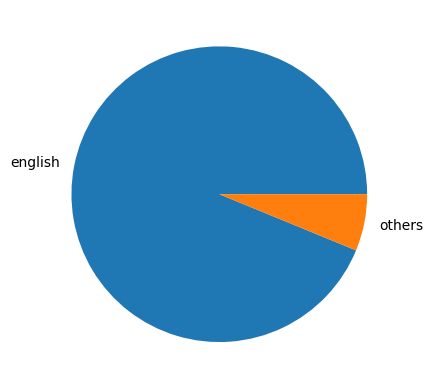

In [12]:
plt.pie(data.total, labels = data.language)

As we can see by the visualizations, the number of english speaking movies is too high compared to the other, so it's interesting to analyse the languages apart from english.

In [13]:
non_english = tmdb.query("original_language != 'en'").original_language.value_counts().to_frame().reset_index()
non_english.columns = ["original_language","total"]
non_english.head()

,original_language,total
0,fr,70
1,es,32
2,zh,27
3,de,27
4,hi,19


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x1000 with 0 Axes>

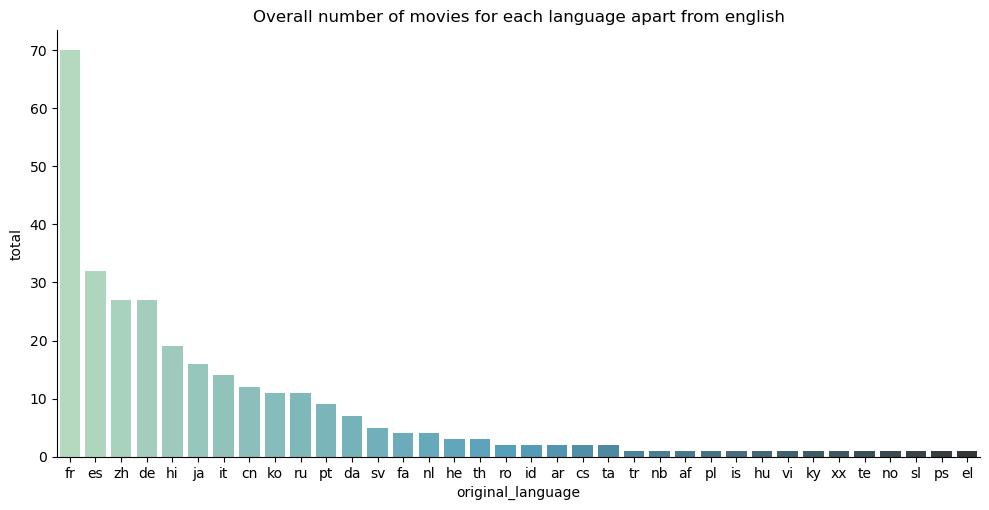

In [49]:
plt.figure(figsize=(5,10))
sns.catplot(x = "original_language",y = "total", data = non_english,aspect=2,kind="bar",palette="GnBu_d").set(title='Overall number of movies for each language apart from english')


The first five are: French. Spanish, Chinese, German and Hindi. Those are the languages with the most movies in this database, apart from english.

# Analysing the budget of the movies for each language

In [15]:
tmdb.budget.describe()

count    4.803000e+03
mean     2.904504e+07
std      4.072239e+07
min      0.000000e+00
25%      7.900000e+05
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

According to the desciption, the average budget is really high, and fewer than 50% of the movies in the database have a higher budget than the average.

In [16]:
tmdb.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [17]:
df = tmdb[['budget','original_language']]

df.head()

,budget,original_language
0,237000000,en
1,300000000,en
2,245000000,en
3,250000000,en
4,260000000,en


In [18]:
df_drop = df.query('budget == 0').index
df.drop(df_drop,axis=0,inplace = True)
df.head()

/tmp/ipykernel_33/3746742273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df_drop,axis=0,inplace = True)


,budget,original_language
0,237000000,en
1,300000000,en
2,245000000,en
3,250000000,en
4,260000000,en


In [19]:
df_total = df.groupby("original_language").sum().reset_index()
df_total_sorted = df_total.sort_values("budget",ascending=False).reset_index()
df_total_sorted

,index,original_language,budget
0,4,en,136926595701
1,29,zh,594691110
2,7,fr,593669811
3,3,de,232641550
4,13,ja,228697699
5,5,es,187125867
6,14,ko,157200000
7,22,ru,153700000
8,1,cn,128716953
9,2,da,68200000


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


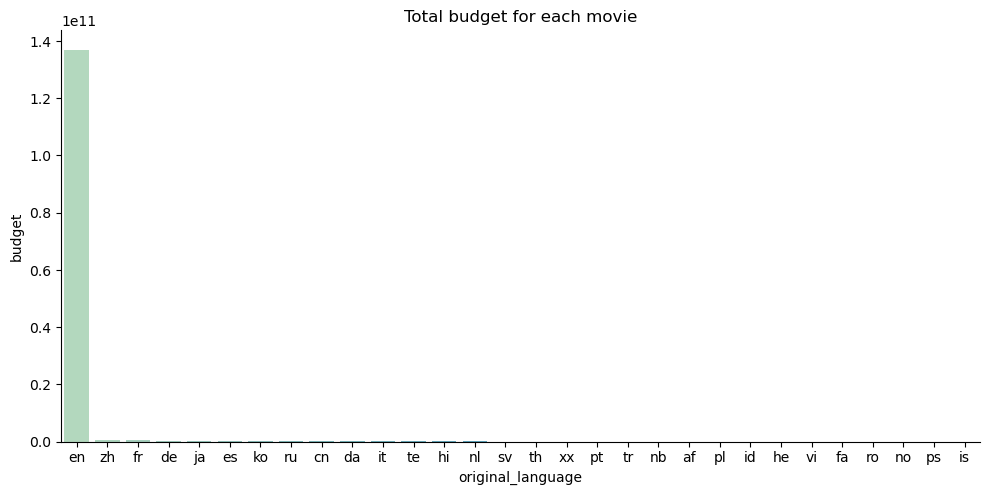

In [50]:
sns.catplot(x = "original_language",y = "budget", data = df_total_sorted,aspect=2,kind="bar",palette="GnBu_d").set(title='Total budget for each movie')


As expectec, the total budget of the english speaking movies is too high, because they have too much entries. We will also analyse the total budget from the movies excluding the english ones as well.

In [21]:
df_non_english =df.query("original_language != 'en'")
df_non_english.head()

,budget,original_language
97,15000000,ja
235,97250400,fr
317,94000000,zh
492,8000000,es
678,65000000,zh


In [22]:
df_total_2 = df_non_english.groupby("original_language").sum().reset_index()
df_total_sorted_2 = df_total_2.sort_values("budget",ascending=False).reset_index()
df_total_sorted_2

,index,original_language,budget
0,28,zh,594691110
1,6,fr,593669811
2,3,de,232641550
3,12,ja,228697699
4,4,es,187125867
5,13,ko,157200000
6,21,ru,153700000
7,1,cn,128716953
8,2,da,68200000
9,11,it,41550030


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


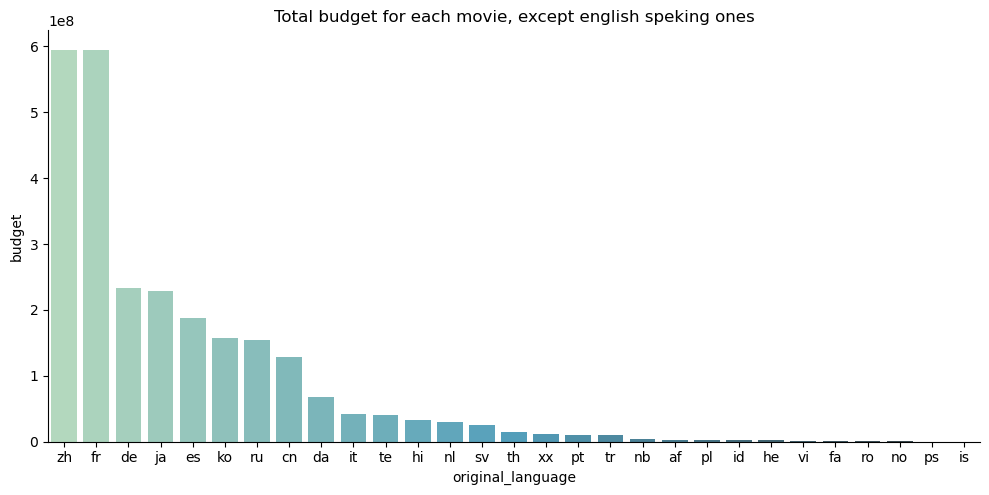

In [51]:
sns.catplot(x = "original_language",y = "budget", data = df_total_sorted_2,aspect=2,kind="bar",palette="GnBu_d").set(title='Total budget of movies for each original language, except english speking ones')

The first five are: Chinese, French, German, Japanese and Spanish. Those are the languages with the most budget movies in this database, apart from english.


In [55]:
bud_mean = df.groupby("original_language").mean().reset_index()
bud_mean_sorted = bud_mean.sort_values("budget",ascending=False).reset_index()
bud_mean_sorted

,index,original_language,budget
0,24,te,4.000000e+07
1,4,en,3.820497e+07
2,29,zh,3.303840e+07
3,23,sv,2.500000e+07
4,14,ko,2.245714e+07
5,22,ru,1.921250e+07
6,1,cn,1.838814e+07
7,13,ja,1.524651e+07
8,7,fr,1.522230e+07
9,3,de,1.454010e+07


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


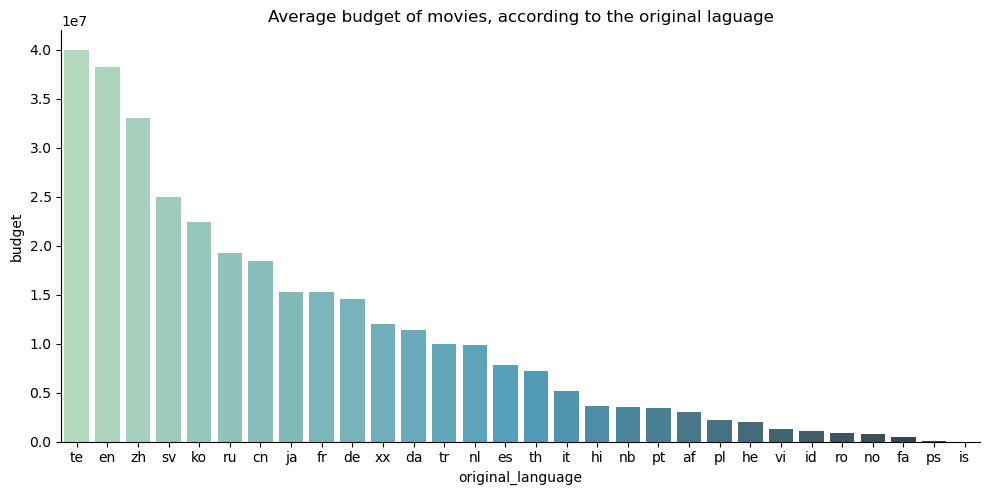

In [56]:
sns.catplot(x = "original_language",y = "budget", data = bud_mean_sorted,aspect=2,kind="bar",palette="GnBu_d").set(title = 'Average budget of movies, according to the original laguage')

If we compare the average budget for each language, there is no need to separate languages, because no one have a really outstanding average.
The first five are: telugu, english, chinese, swedish and korean. We can understand the averages about english and chinese, because they have a high volume of movies in the database, as we could see in the first part. Telugu have, probably, one movie, so the average is high. Swedish and Korean are in the middle of the overall number of movies, but they are high in the average.

# Analysing the average voting grade for each original language

In [36]:
tmdb.vote_average.describe()

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

We can see that more than 50% of the movies have a higher average voting than the mean, but just 25% of the movies have a high grade that is more than 6.8

In [25]:
df2 = tmdb[['vote_average','original_language']]

df2.head()

,vote_average,original_language
0,7.2,en
1,6.9,en
2,6.3,en
3,7.6,en
4,6.1,en


In [33]:
df2_mean = df2.groupby("original_language").mean().reset_index()
df2_mean_sorted = df2_mean.sort_values("vote_average",ascending=False).reset_index()
df2_mean_sorted

,index,original_language,vote_average
0,31,te,7.500000
1,14,id,7.400000
2,11,he,7.400000
3,9,fa,7.375000
4,1,ar,7.300000
5,21,nl,7.175000
6,4,da,7.128571
7,35,xx,7.100000
8,23,pl,7.100000
9,29,sv,7.060000


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x1000 with 0 Axes>

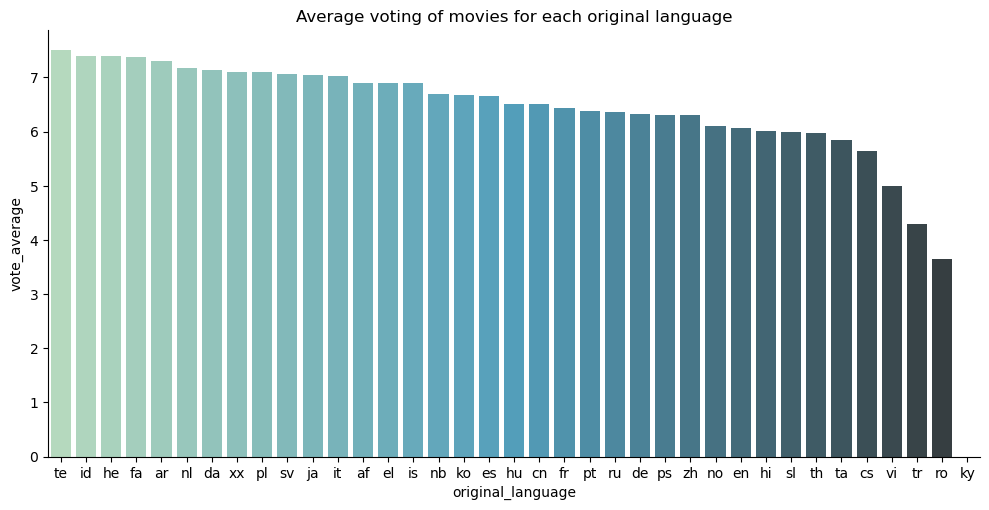

In [57]:
plt.figure(figsize=(5,10))
sns.catplot(x = "original_language",y = "vote_average", data = df2_mean_sorted,aspect=2,kind="bar",palette="GnBu_d").set(title='Average voting of movies for each original language')

They must really love that movie in Telugu, because it is the leader in here as well. The other four higher are indonesian, hebrew, persian and arabic, again, mostly languages with few total entries in the data.

# Popularity

In [37]:
tmdb.popularity.describe()

count    4803.000000
mean       21.492301
std        31.816650
min         0.000000
25%         4.668070
50%        12.921594
75%        28.313505
max       875.581305
Name: popularity, dtype: float64

Popularity is a strange number, but seems like the higher the number, the most popular the movie is. The max value of popularity is much more higher than the average, but there are around 25% of the movies that have a higher popularity.

In [39]:
pop = tmdb[['popularity','original_language']]

pop.head()

,popularity,original_language
0,150.437577,en
1,139.082615,en
2,107.376788,en
3,112.312950,en
4,43.926995,en


In [41]:
pop_mean = pop.groupby("original_language").mean().reset_index()
pop_mean_sorted = pop_mean.sort_values("popularity",ascending=False).reset_index()
pop_mean_sorted

,index,original_language,popularity
0,6,el,28.858238
1,17,ja,25.663788
2,14,id,24.586253
3,7,en,22.177435
4,18,ko,19.488720
5,16,it,17.818268
6,4,da,17.663925
7,31,te,16.254032
8,8,es,13.330804
9,23,pl,13.265432


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x1000 with 0 Axes>

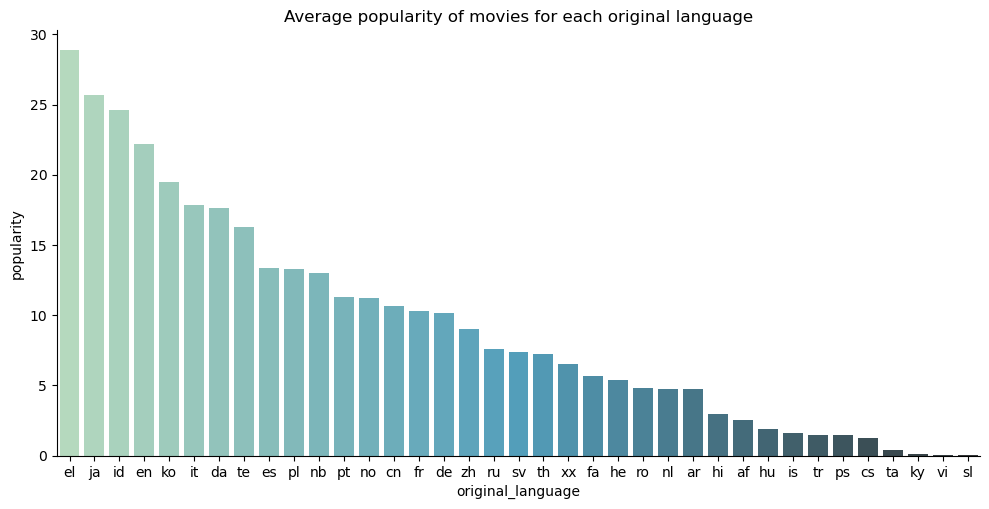

In [58]:
plt.figure(figsize=(5,10))
sns.catplot(x = "original_language",y = "popularity", data = pop_mean_sorted,aspect=2,kind="bar",palette="GnBu_d").set(title='Average popularity of movies for each original language')

Here we have a top 5 consisting of: greek, japanese, indonesian, english and korean. I expected to see the average of the english movies to drop because of the high number of entries, but if they got a good average, must be because they have lots of popular movies in english.

# Revenue

In [43]:
tmdb.revenue.describe()

count    4.803000e+03
mean     8.226064e+07
std      1.628571e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.917000e+07
75%      9.291719e+07
max      2.787965e+09
Name: revenue, dtype: float64

The average of revenue is much more higher than the median. That is also expected, mostly because the data has too much movies in english, and they have a tendency to have high profit movies in this language.

In [44]:
rev = tmdb[['revenue','original_language']]

rev.head()

,revenue,original_language
0,2787965087,en
1,961000000,en
2,880674609,en
3,1084939099,en
4,284139100,en


In [45]:
rev_mean = rev.groupby("original_language").mean().reset_index()
rev_mean_sorted = rev_mean.sort_values("revenue",ascending=False).reset_index()
rev_mean_sorted

,index,original_language,revenue
0,31,te,1.000000e+08
1,7,en,8.647885e+07
2,17,ja,6.602892e+07
3,35,xx,5.526056e+07
4,36,zh,4.173498e+07
5,2,cn,3.374016e+07
6,4,da,2.989889e+07
7,18,ko,2.535645e+07
8,8,es,1.865218e+07
9,5,de,1.396191e+07


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x1000 with 0 Axes>

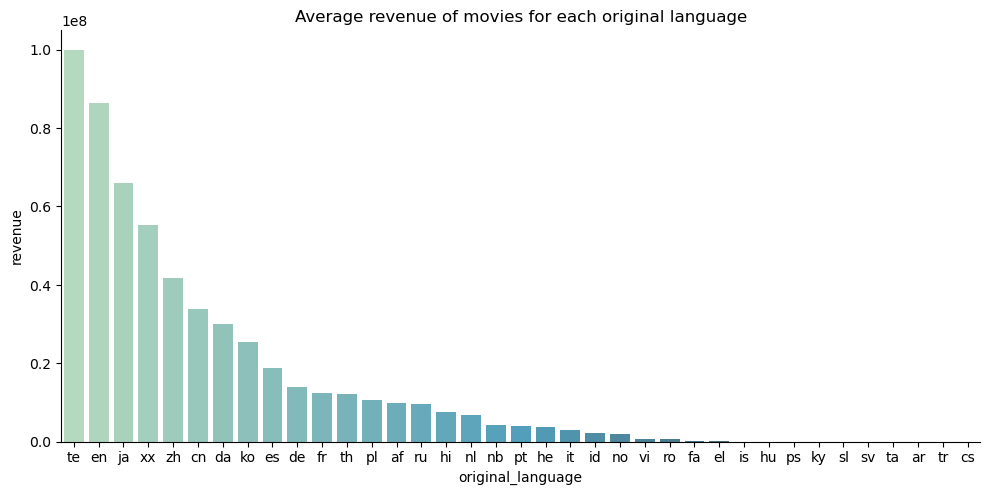

In [59]:
plt.figure(figsize=(5,10))
sns.catplot(x = "original_language",y = "revenue", data = rev_mean_sorted,aspect=2,kind="bar",palette="GnBu_d").set(title='Average revenue of movies for each original language')

Heve we have a concrete proof that the movie in telugu must be huge. The other big revenues are english, japanese, and danish. I could not identify the codes for 'xx' and 'cn'.

# I need to find this movie in TE right now

In [68]:
te = tmdb.query("original_language == 'te'")
te

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1290,40000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://baahubali.com/,256040,"[{""id"": 4152, ""name"": ""kingdom""}, {""id"": 6091,...",te,Baahubali: The Beginning,The young Shivudu is left as a foundling in a ...,16.254032,"[{""name"": ""Arka Media Works"", ""id"": 57946}]","[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",2015-07-10,100000000,159.0,"[{""iso_639_1"": ""ml"", ""name"": """"}, {""iso_639_1""...",Released,NaN,Baahubali: The Beginning,7.5,135


Telugu is also an language from India, so that also explains the high revenue of the movie. Now I am curious and want to watch this movie as well!

# Finding other movies from unkown languages in the last barplot

In [69]:
xx = tmdb.query("original_language == 'xx'")
xx

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2787,12000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",NaN,62204,"[{""id"": 4428, ""name"": ""stone age""}, {""id"": 159...",xx,La Guerre du feu,A colossal adventure odyssey that turns back t...,6.537986,"[{""name"": ""Belstar Productions"", ""id"": 999}, {...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",1981-12-15,55260558,100.0,"[{""iso_639_1"": ""xx"", ""name"": ""No Language""}]",Released,NaN,Quest for Fire,7.1,109


In [79]:
xx_info = xx.production_countries.reset_index()
xx_info

,index,production_countries
0,2787,"[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso..."


Seems like this movie is from Canada and the text inside de column is typed in json. I tried to extract the whole list, but I couldn't. I excluded this part from the final report.

In [83]:
cn = tmdb.query("original_language == 'cn'")
cn

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1357,36000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",NaN,365222,"[{""id"": 5565, ""name"": ""biography""}]",cn,葉問3,When a band of brutal gangsters led by a crook...,19.167377,"[{""name"": ""Mandarin Films Distribution Co."", ""...","[{""iso_3166_1"": ""HK"", ""name"": ""Hong Kong""}]",2015-12-19,156844753,105.0,"[{""iso_639_1"": ""cn"", ""name"": ""\u5e7f\u5dde\u8b...",Released,NaN,Ip Man 3,6.5,379
1955,25000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 28, ""name...",NaN,290864,"[{""id"": 779, ""name"": ""martial arts""}, {""id"": 7...",cn,一個人的武林,A martial arts instructor working at a police ...,6.895866,"[{""name"": ""Emperor Motion Pictures"", ""id"": 272...","[{""iso_3166_1"": ""HK"", ""name"": ""Hong Kong""}, {""...",2014-10-31,0,100.0,"[{""iso_639_1"": ""cn"", ""name"": ""\u5e7f\u5dde\u8b...",Released,Kung Fu is a Skill for Killing,Kung Fu Jungle,6.5,114
2013,23000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://www.bodyguardsandassassins.com/,30596,"[{""id"": 441, ""name"": ""assassination""}, {""id"": ...",cn,十月圍城,"In 1905, revolutionist Sun Yat-Sen visits Hong...",7.876883,"[{""name"": ""China Film Group Corporation"", ""id""...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}]",2009-12-18,5837674,139.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,"To save a nations future, they must protect on...",Bodyguards and Assassins,6.5,57
2184,20000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",NaN,9470,"[{""id"": 780, ""name"": ""kung fu""}, {""id"": 2343, ...",cn,功夫,"Set in Canton, China in the 1940s, the story r...",13.658985,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2004-02-10,100914445,99.0,"[{""iso_639_1"": ""cn"", ""name"": ""\u5e7f\u5dde\u8b...",Released,So many gangsters...so little time.,Kung Fu Hustle,7.2,831
2262,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,13688,"[{""id"": 9736, ""name"": ""little boy""}, {""id"": 97...",cn,長江七號,"Ti, a really poor construction worker that str...",12.373248,"[{""name"": ""Columbia Pictures Film Production A...","[{""iso_3166_1"": ""HK"", ""name"": ""Hong Kong""}]",2008-01-30,47301471,86.0,"[{""iso_639_1"": ""cn"", ""name"": ""\u5e7f\u5dde\u8b...",Released,It's out of this world.,CJ7,6.1,107
2309,0,"[{""id"": 28, ""name"": ""Action""}]",NaN,244339,[],cn,逃出生天,"On the hottest day in 50 years, a serious fire...",1.583918,"[{""name"": ""Sun Entertainment Culture"", ""id"": 2...","[{""iso_3166_1"": ""HK"", ""name"": ""Hong Kong""}, {""...",2013-03-10,0,107.0,"[{""iso_639_1"": ""cn"", ""name"": ""\u5e7f\u5dde\u8b...",Released,NaN,Out of Inferno,5.8,11
3099,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",NaN,11770,"[{""id"": 779, ""name"": ""martial arts""}, {""id"": 1...",cn,少林足球,A young Shaolin follower reunites with his dis...,17.547680,"[{""name"": ""Star Overseas"", ""id"": 3477}, {""name...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2001-07-12,42776760,113.0,"[{""iso_639_1"": ""cn"", ""name"": ""\u5e7f\u5dde\u8b...",Released,Get ready to kick some grass!,Shaolin Soccer,6.6,491
3309,7500000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 28, ""name...",NaN,33542,"[{""id"": 242, ""name"": ""new york""}, {""id"": 779, ...",cn,紅番區,Keong comes from Hong Kong to visit New York f...,17.318839,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""HK"", ""name"": ""Hong Kong""}]",1995-01-30,32392047,91.0,"[{""iso_639_1"": ""cn"", ""name"": ""\u5e7f\u5dde\u8b...",Released,No Fear. No Stuntman. No Equal.,Rumble in the Bronx,6.5,240
3400,0,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name...",NaN,277519,[],cn,Z 風暴,This is a story about t

Seems like 'cn' is another abreviation for a language from China, Hong Kong or for movies from both.

# Final thoughts

I thought that movies in english would dominate most of the analysis, because they probably are mostly from USA, but I had to consider as well that India and China are huge markets, and the one and only movie in Telugu proves that point, because it is from India and dominated lots of visualizations, specially those with based on averages.

If you liked this notebook and knows how to extract the data inside columns in json, let me know. But I will probably seek other notebooks to see if I can learn how to complete this report.